In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Korean-Japanese Trade

In [9]:
ja_dir = 'ja_kor_trade/'
oth_dir = 'oth_kor_trade/'

trade_history = pd.read_csv(oth_dir + 'ja_kor_trade_history.csv')

We read in UN Comtrade data regarding annual bilateral trade flows between Japan and Korea as reported by Japan, spanning 1988-2021.

In [10]:
trade_history

,Classification,Year,Period,Period Desc.,Aggregate Level,Is Leaf Code,Trade Flow Code,Trade Flow,Reporter Code,Reporter,...,Qty,Alt Qty Unit Code,Alt Qty Unit,Alt Qty,Netweight (kg),Gross weight (kg),Trade Value (US$),CIF Trade Value (US$),FOB Trade Value (US$),Flag
0,H0,1988,1988,1988,5,0,0,M,392,Japan,...,NaN,-1,NaN,NaN,NaN,NaN,11823022904,1.182302e+10,NaN,0
1,H0,1988,1988,1988,5,0,0,X,392,Japan,...,NaN,-1,NaN,NaN,NaN,NaN,15437862829,NaN,1.543786e+10,0
2,H0,1989,1989,1989,5,0,0,M,392,Japan,...,NaN,-1,NaN,NaN,NaN,NaN,13007693600,1.300769e+10,NaN,0
3,H0,1989,1989,1989,5,0,0,X,392,Japan,...,NaN,-1,NaN,NaN,NaN,NaN,16591881184,NaN,1.659188e+10,0
4,H0,1990,1990,1990,5,0,0,M,392,Japan,...,NaN,-1,NaN,NaN,NaN,NaN,11717775626,1.171778e+10,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,H5,2019,2019,2019,5,0,0,X,392,Japan,...,0.0,-1,NaN,0.0,0.0,0.0,46265486184,0.000000e+00,4.626549e+10,4
64,H5,2020,2020,2020,5,0,0,M,392,Japan,...,0.0,-1,NaN,0.0,0.0,0.0,26599512864,2.659951e+10,0.000000e+00,4
65,H5,2020,2020,2020,5,0,0,X,392,Japan,...,0.0,-1,NaN,0.0,0.0,0.0,44688451486,0.000000e+00,4.468845e+10,4
66,H5,2021,2021,2021,5,0,0,M,392,Japan,...,0.0,-1,NaN,0.0,0.0,0.0,32082167819,3.208217e+10,0.000000e+00,4


With the dataset, we are able to plot exports and imports over time.

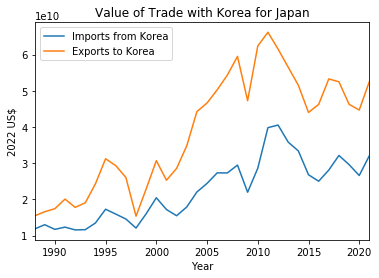

In [11]:
fig, ax = plt.subplots()
trade_history[trade_history['Trade Flow'] == 'M'].plot(ax=ax, x='Year', y='Trade Value (US$)')
trade_history[trade_history['Trade Flow'] == 'X'].plot(ax=ax, x='Year', y='Trade Value (US$)')
# ax.axvline(x=2012, linestyle='dashed', color='grey')
ax.legend(['Imports from Korea', 'Exports to Korea', 'KORUS'])
ax.set_title('Value of Trade with Korea for Japan')
ax.set_ylabel('2022 US$')
plt.show()

We next load import volumes by Harmonized System 6 (HS6) classifications of goods.

In [12]:
def get_import_goods(dir, ctry, t):
    ctry_kor_imports_t = pd.read_csv(dir + ctry + '_kor_trade_' + str(t) +'.csv', usecols=['Year', 'Trade Flow', 'Reporter', 'Partner', 'Commodity Code', 'Commodity', 'Trade Value (US$)'])
    ctry_kor_imports_t = ctry_kor_imports_t[ctry_kor_imports_t['Trade Flow'] == 'Import']
    ctry_kor_imports_t['Commodity Code'] = ctry_kor_imports_t['Commodity Code'].astype('str')
    ctry_kor_imports_t['Commodity Code'] = ctry_kor_imports_t['Commodity Code'].apply(lambda s : s.rjust(6, '0'))
    return ctry_kor_imports_t

In [13]:
ja_kor_imports_1991 = get_import_goods(oth_dir, 'ja', 1991)
ja_kor_imports_2011 = get_import_goods(oth_dir, 'ja', 2011)
#ja_kor_imports_2019 = get_import_goods(oth_dir, 'us', 2019)

Below is a preview of 2011's import itemization.

In [14]:
ja_kor_imports_2011

,Year,Trade Flow,Reporter,Partner,Commodity Code,Commodity,Trade Value (US$)
3,2011,Import,Japan,Rep. of Korea,010619,"Live mammals, n.e.s.",358761
5,2011,Import,Japan,Rep. of Korea,010620,"Live reptiles, incl. snakes & turtles",2863
6,2011,Import,Japan,Rep. of Korea,021099,"Meat & edible meat offal, n.e.s., salted/in br...",48828
8,2011,Import,Japan,Rep. of Korea,030192,Live eels (Anguilla spp.),1038181
10,2011,Import,Japan,Rep. of Korea,030199,"Live fish(excl. of 0301.10-0301.95),n.e.s.",70428799
...,...,...,...,...,...,...,...
6730,2011,Import,Japan,Rep. of Korea,970110,"Paintings, drawings & pastels, executed entire...",1751069
6733,2011,Import,Japan,Rep. of Korea,970190,Collages & similar decorative plaques,38027
6736,2011,Import,Japan,Rep. of Korea,970300,"Original sculptures & statuary, in any material",57405
6738,2011,Import,Japan,Rep. of Korea,970500,Collections & collectors' pieces of zoological...,3002


## Trade by Industry

We read in ADH's crosswalk table that converts between HS6-encoded goods and their SIC87dd codes, in other words, mapping from good category to industry.

In [15]:
cw = pd.read_csv('cw_hs6_sic87dd.csv')

# Format HS6 as a 6-digit string with leading zeros as needed.
cw['hs6'] = cw['hs6'].astype('str')
cw['hs6'] = cw['hs6'].apply(lambda s : s.rjust(6, '0')) 

# Drops unusable, non-numerical observations. It is not understood why these are on the conversion table.
cw = cw[cw['weights_method'] != 'trade-based allocated 314X imports'] 

Our table is converted into a Python dictionary aka "map" data structure, that can be used programatically as a lookup table. We map each HS6 code to an object containing the SIC87dd code and its respective weight.

In [16]:
from collections import defaultdict

cw_map = defaultdict(list)

for row in cw.values:
    hs6 = row[0]
    sic87dd = row[1]
    weight = row[2]
    cw_map[hs6].append((sic87dd, weight))

Next, we define a function that takes in a given year's import itemization by HS6, and uses the HS6-to-SIC87dd map to return a breakdown of import volume pertaining to each industry, weighting each HS6 trade volume by that industry's share of the HS6 good.

In [17]:
def imports_by_sic87dd(kor_imports_t):
    imports_sic87dd_map = dict()
    for index, row in kor_imports_t.iterrows():
        hs6 = row['Commodity Code']
        t = row['Year']
        volume = row['Trade Value (US$)']
        sic87dd_codes = cw_map[hs6]

        for sic87dd, weight in sic87dd_codes:
            if sic87dd in imports_sic87dd_map:
                imports_sic87dd_map[sic87dd] += volume*weight
            else:
                imports_sic87dd_map[sic87dd] = volume*weight

    return imports_sic87dd_map

We apply this function to Japan's Korean imports at multiple points in time, obtaining import volume pertaining to each industry, at each time.

In [18]:
ja_kor_imports_1991_industry = imports_by_sic87dd(ja_kor_imports_1991)
ja_kor_imports_2011_industry = imports_by_sic87dd(ja_kor_imports_2011)
#us_kor_imports_2019_industry = imports_by_sic87dd(us_kor_imports_2019)

Below is a a preview of 2011's import breakdown by industry, using ADH's sic87dd codes.

In [19]:
df_ja_kor_imports_2011_industry = pd.Series(ja_kor_imports_2011_industry).reset_index().set_index('index')
df_ja_kor_imports_2011_industry.columns = ['Import Volume (2022 US$)']
df_ja_kor_imports_2011_industry.index.names = ['sic87dd']
df_ja_kor_imports_2011_industry = df_ja_kor_imports_2011_industry.sort_index()
df_ja_kor_imports_2011_industry

,Import Volume (2022 US$)
sic87dd,
116.0,4.747000e+03
139.0,1.690537e+06
161.0,8.772172e+07
171.0,3.749520e+06
175.0,4.099100e+04
...,...
3996.0,1.981099e+07
3999.0,6.311566e+07
9100.0,5.473605e+08


Our key independent variable is the change in import volume, as a measure of trade exposure. We define a function that takes in two such industry-level breakdowns at times t0 and t1 and computes the change in import volume between them. We account for sources of programatic error such as if an industry appears in t0 but not t1 (exited the economy) or t1 but not t0 (entered the economy).

In [20]:
# Computes the change in imports by industry
def delta_imports_by_sic87dd(map_t0 : dict, map_t1 : dict):
    enter_ind = map_t1.keys() - map_t0.keys()
    exit_ind = map_t0.keys() - map_t1.keys()
    constant_ind = set(map_t0.keys()).intersection(set(map_t1.keys()))
    delta = {
        sic87dd: map_t1[sic87dd]-map_t0[sic87dd] for sic87dd in constant_ind
    } 
    # If an industry never existed, all change is effectively from 0. If an industry no longer exists, all change is toward 0.
    for ind in enter_ind:
        delta[ind] = map_t1[ind]  
    for ind in exit_ind:
        delta[ind] = -map_t0[ind]
    return delta



In [21]:
delta_imports_ja_kor_1991 = delta_imports_by_sic87dd(ja_kor_imports_1991_industry, ja_kor_imports_2011_industry)
#delta_imports_ja_kor_2011 = delta_imports_by_sic87dd(ja_kor_imports_2011_industry, ja_kor_imports_2019_industry)

Below is the $\Delta M_j$ variable at $t=1991$, i.e. the change in import volume between 1991 and 2011.

In [22]:
df_delta_imports_ja_kor_1991 = pd.DataFrame(pd.Series(delta_imports_ja_kor_1991)).reset_index().set_index('index')
df_delta_imports_ja_kor_1991.columns = ['Change in Trade Volume']
df_delta_imports_ja_kor_1991.index.names = ['sic87dd']
df_delta_imports_ja_kor_1991

,Change in Trade Volume
sic87dd,
2048.0,-4.073269e+05
2051.0,1.509342e+07
2062.0,1.863829e+06
2064.0,-4.712258e+06
2066.0,2.801498e+07
...,...
1231.0,-3.710000e+03
3292.0,-4.451613e+06
3652.0,-4.951075e+06


## Employment by Industry

We read in ADH's employment counts by industry for the start of time periods, derived from County Business Patterns data.

In [23]:
emp = pd.read_csv('cbp_czone_merged.csv', index_col=['year','czone', 'sic87dd']).drop(columns='Unnamed: 0').query('year == 1991 or year == 2011')
# visualize change in employment over time: emp.query('czone == 100').reset_index().set_index(['sic87dd', 'year']).sort_index().groupby('sic87dd')['emp'].plot(legend=True)

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [24]:
emp

emp
year czone   sic87dd              
1991 100.0   710         32.155633
             740        215.254360
             780        325.164422
             800          1.715610
             900          1.629935
...                            ...
2011 39400.0 8660     23395.497464
             8711     23082.890378
             8720     15626.273440
             8731      8436.885793
             8741     32788.080068

[691676 rows x 1 columns]

In [25]:
emp_yeargp = emp.groupby('year')
emp_2011 = emp_yeargp.get_group(2011)
emp_1991 = emp_yeargp.get_group(1991)

We can break down the data into separate tables depending on the year. For the pre-KORUS era, we need 1991's starting employment counts.

In [26]:
emp_1991

emp
year czone   sic87dd              
1991 100.0   710         32.155633
             740        215.254360
             780        325.164422
             800          1.715610
             900          1.629935
...                            ...
     39400.0 8660     13925.100480
             8711     14328.197709
             8720      8290.882352
             8731      4271.047487
             8741      8363.752352

[345838 rows x 1 columns]

And furthermore, we can consolidate our data into 1991's total employment per CZ.

In [27]:
L_zone_ind_1991 = emp_1991.groupby('czone').sum()
L_zone_ind_2011 = emp_2011.groupby('czone').sum()
L_zone_ind_1991

,emp
czone,
100.0,1.729097e+05
200.0,5.852608e+04
301.0,1.420334e+04
302.0,2.211627e+05
401.0,1.736506e+05
...,...
39205.0,1.677469e+03
39301.0,2.644857e+03
39302.0,4.489638e+04


As well as that year's employment per industry. 

In [28]:
L_ind_1991 = emp_1991.groupby('sic87dd').sum()
L_ind_2011 = emp_2011.groupby('sic87dd').sum()
L_ind_1991

,emp
sic87dd,
710,8.665858e+04
740,1.272138e+05
780,2.572130e+05
800,1.843035e+04
900,4.546757e+04
...,...
8660,1.133337e+06
8711,8.112493e+05
8720,6.565551e+05


In [29]:
CZ_ALL = set(emp.index.get_level_values('czone'))
IND_ALL = set(emp.index.get_level_values('sic87dd'))

Now we have the data needed to propagate import flows across local labor markets, in proportion to their share within an industry's employment.

## $\Delta IPW$: Change in Import Volumes Relative to Workers

The following function implements ADH's Equation 3

In [30]:
def change_imports_per_worker(emp_t, t, L_ind_t, L_zone_ind_t, delta_imports_t):
    delta_ipw_ja_t = defaultdict(int)
    for cz in CZ_ALL:
        for j in IND_ALL:
            try:
                l_ind_cz = emp_t.loc[t, cz, j]['emp']
                l_ratio = l_ind_cz / L_ind_t.loc[j]

                mpw = delta_imports_t[j] / L_zone_ind_t.loc[cz]
                delta_ipw_ja_t[cz] += (l_ratio * mpw).values[0]
                
            except KeyError as error:
                pass
    return delta_ipw_ja_t

**Warning: Running the following two cells is computationally expensive**

In [31]:
delta_ipw_ja_1991 = change_imports_per_worker(emp_1991, 1991, L_ind_1991, L_zone_ind_1991, delta_imports_ja_kor_1991)

In [32]:
#delta_ipw_ja_2011 = change_imports_per_worker(emp_2011, 2011, L_ind_2011, L_zone_ind_2011, delta_imports_ja_kor_2011)

In [39]:
df_ipw_ja_1991 = pd.Series(delta_ipw_ja_1991).reset_index().set_index('index')
df_ipw_ja_1991.columns = ['d_tradejakor_pw']
df_ipw_ja_1991.index.names = ['czone']
df_ipw_ja_1991 = df_ipw_ja_1991.sort_index().apply(lambda x : x/1000 * (20/10)) # Divide by 1000 so that we look at every $1000/worker increase

We now have change in trade flow per CZ per worker between 1991-2011, except scaled to the _decade_ (following ADH's footsteps). 

In [40]:
df_ipw_ja_1991

,d_tradejakor_pw
czone,
100.0,0.505410
200.0,0.140185
301.0,-0.177148
302.0,0.161893
401.0,0.073277
...,...
39205.0,-0.166481
39301.0,0.021325
39302.0,3.693659


In [35]:
df_ipw_ja_1991.to_csv('ipw_ja_1991.csv', index=False)

In [36]:
# df_ipw_ja_2011 = pd.Series(delta_ipw_ja_2011).reset_index().set_index('index')
# df_ipw_ja_2011.columns = ['d_tradeuskor_pw']
# df_ipw_ja_2011.index.names = ['czone']
# df_ipw_ja_2011 = df_ipw_ja_1991.sort_index().apply(lambda x : x/100 * 10/9)

In [37]:
# df_ipw_ja_2011

In [38]:
#df_ipw_ja_2011.to_csv('ipw_ja_2011.csv', index=False)